# Ternary System
<br> A typical ternary system consists of nonsolvent (1), solvent(2) and polymer(3).
\begin{align*}
 \psi_i=\frac{m_i \varphi_i}{1-2\chi_i}\\
 \varphi_i=\frac{\psi_i}{m_i(1-2\psi_i)}\\
 \chi_1 = \frac{1}{2}(\chi_{12} + \chi_{13} - \chi_{23})\\
 \chi_1 = \frac{1}{2}(\chi_{12} + \chi_{23} - \chi_{13})\\
 \chi_1 = \frac{1}{2}(\chi_{13} + \chi_{23} - \chi_{12})
\end{align*}
for more inofrmation about the comepelet formulations, please see:
<br> [1] Zhou, B. (2006). Simulations of polymeric membrane formation in 2D and 3D (Doctoral dissertation, Massachusetts Institute of Technology).

In [9]:
%reset
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

N1 = 1.0
N2 = 1.0
N3 = 1.0
chi12 = 5.0
chi13 = 1.0
chi23 = 1.0

chi1 = 0.5*(chi12 + chi13 - chi23)
chi2 = 0.5*(chi12 + chi23 - chi13)
chi3 = 0.5*(chi13 + chi23 - chi12)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Critical Point
<br> The critical point can be solved by solving the following three equations:
\begin{align*}
 \psi_1+\psi_2+\psi_3=0\\
 \psi_1(1+2\chi_1\psi_1)^2+\psi_2(1+2\chi_2\psi_2)^2+m\psi_3(1+2\chi_3\psi_3)^2=0\\
 \varphi_1+\varphi_2+\varphi_3 = 1
\end{align*}

In [10]:
## following equation is defined for obtaining the critical point
def equations(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2

   
    f1 = phi1*(1.-2.*chi2*phi2)*(1.-2.*chi3*phi3) +\
         phi2*(1.-2.*chi1*phi1)*(1.-2.*chi3*phi3) +\
         N3*phi3*(1.-2.*chi1*phi1)*(1.-2.*chi2*phi2)
    f2 = phi1*(1.-2.*chi2*phi2)**3.*(1.-2.*chi3*phi3)**3. +\
         phi2*(1.-2.*chi1*phi1)**3.*(1.-2.*chi3*phi3)**3. +\
         N3*phi3*(1.-2.*chi1*phi1)**3.*(1.-2.*chi2*phi2)**3.
    
    return (f1,f2)

Let's plot "equations" function to see approximately the location of the critical point. To this end, we plot each equation in the "equations" function separately. 

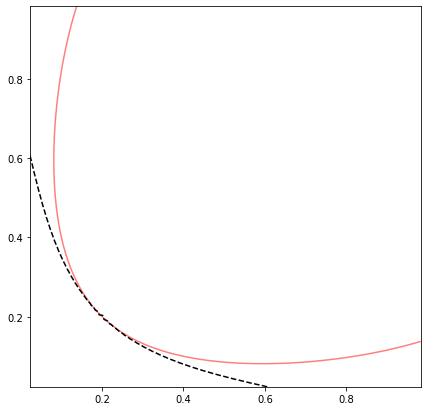

In [11]:
###
x, y = np.meshgrid(
    np.arange(.023, .99, 0.01),
    np.arange(.023, .99, 0.01))
plt.figure(figsize=(7,7))
lev = [0.0, 0.2, 0.6]#np.arange(0, 3, 0.1)
Eq1_fig = plt.contour(x, y,
             equations([x, y])[0], 
             levels=[0], alpha=0.5, cmap='rainbow_r')
Eq2_fig = plt.contour(x, y,
             equations([x, y])[1],
            levels=[0], alpha=1, cmap='gray', linestyles='dashed')

PLEASE NOTE: FSOLVE FINDS THE CLOSEST ROOT TO THE FIRST GUESS GRID IS DEFINED TO SEARCH ALL 4 REGIONS CLOSE TO THE ROOTS ONE WAY TO FIND ALL THE ROOTS, IF YOU HAD NO IDEA ABOUT THE FIRST GUESS, IS TO MESH THE DOMAIN. 

calculation for obtaining the critical point

In [12]:
x_dim = np.arange(0.01, 0.99, 0.001)
y_dim = x_dim

grid = np.zeros((len(x_dim)*len(y_dim), 2))

m = 0
for i in range(len(x_dim)):
    for j in range(len(y_dim)):
        grid[m,:] = x_dim[i], y_dim[j]
        m+=1

Following will solve the "equations" with three different methods. (fsolve, Newton's, skimming the meshgrid)

In [13]:
roots =[]
from tqdm.notebook import tqdm

## method 1 in obtaing critical points (fsolve optimization)
# for i in tqdm(range(len(grid))):
#     initial_guess = optimize.fmin(f, (grid[i]))
#     pr = optimize.fsolve(equations, initial_guess)
#     if np.sqrt(np.sum(np.array(equations(pr))**2.))<1e-11:
#         roots.append(pr)

## method 2 in obtaing critical points (last resort; when all numerical methods fail)
for i in tqdm(range(len(grid))):
    if (np.abs(equations(grid[i]))<0.001).all():
        roots.append(grid[i])

## method 3 in obtaing critical points (Newton's method)
# for i in tqdm(range(len(grid))):
#     pr = optimize.root(equations, grid[i], jac=False, method='hybr')
#     roots.append(pr.x)
        
roots = np.asarray(roots)

r3 = 1.-(roots[:,0]+roots[:,1])
roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
              ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]

rounded_root = np.round(roots, 3)
print("(phi1, phi2, phi3):", (rounded_root[0,0], rounded_root[0,1], 1.-(rounded_root[0,0]+rounded_root[0,1])))


(phi1, phi2, phi3): (0.175, 0.228, 0.597)


## Spinodal
<br> For obtaining the spinodal points, we do not need to solve any equations, because it can be found from the previous plot. Note that equation for the spinodal points is exactly the red curve. Since spinodal equation is pretty simple, we just skim the 2D domain and find the points that satisfies the "equation_spinodal".

\begin{equation*}
\psi_1+\psi_2+\psi_3=0
\end{equation*}

In [14]:
x_dim = np.arange(0.023, 0.99, 0.001) #these numbers are chosen emperically
grid = np.zeros((len(x_dim)**2, 2))

c = 0
for i in range(len(x_dim)):
    for j in range(len(x_dim)):
        grid[c,:] = x_dim[i], x_dim[j]
        c+=1

def equation_spinodal(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2


    f1 = phi1*(1.0-2.0*chi2*phi2)*(1.0-2.0*chi3*phi3) +\
         phi2*(1.0-2.0*chi1*phi1)*(1.0-2.0*chi3*phi3) +\
         N3*phi3*(1.0-2.0*chi1*phi1)*(1.0-2.0*chi2*phi2)

    return (f1)

roots_spinodal = []
for i in range(len(grid)):
    aaa = equation_spinodal(grid[i])
    if abs(aaa)<0.001: 
        roots_spinodal.append(grid[i])
roots_spinodal = np.asarray(roots_spinodal)
roots_spinodal = roots_spinodal[((roots_spinodal[:,0]>=0.0) & (roots_spinodal[:,0]<=1.0) & (roots_spinodal[:,1]>=0.0) & \
                                 (roots_spinodal[:,1]<=1.0) & ((1.-roots_spinodal[:,0]-roots_spinodal[:,1])>=0.0) & \
                                 ((1.-roots_spinodal[:,0]-roots_spinodal[:,1])<=1.0))]
points_sp = roots_spinodal

## Binodal
<br>Similarly, the binodal is defined by solving the following three equations:

\begin{align*}
 \Delta\mu_1^\prime = \Delta\mu_1^" \\
 \Delta\mu_2^\prime = \Delta\mu_2^" \\
 \Delta\mu_3^\prime = \Delta\mu_3^"
\end{align*}

And substitute $\varphi_1^\prime$ and $\varphi_2^\prime$ by the following relations:
\begin{align*}
 \varphi_1^\prime+\varphi_2^\prime+\varphi_3^\prime=1\\
  \varphi_1^"+\varphi_2^"+\varphi_3^"=1
 \end{align*}

In [15]:
x_dim = np.arange(0.023, 0.99, 0.1) ###these numbers are chosen emperically
y_dim = x_dim
z_dim = x_dim
skimmer = np.arange(0.023, 0.99, 0.05)  ###these numbers are chosen emperically
binodal_points = [] ### roots that we are looking for
other_roots = [] ### it's used just to save roots that are not useful
all_roots = [] #all the roots in one array

def ln_t(x0):
    asd = 0.0
    for i in range(1,20):
        asd = asd - (-1.0)**i * (1/i)*(x0-1.0)**i
    return asd
from tqdm.notebook import tqdm
for skim in tqdm(skimmer):
    
    grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 4))

    c = 0
    for i in range(len(x_dim)):
        for j in range(len(y_dim)):
            for k in range(len(z_dim)):
                grid[c,:] = x_dim[i], y_dim[j], z_dim[k], skim
                c+=1
            
    def equations2(PHI):
        phi1_1, phi2_1, phi1_2, phi2_2 = PHI
        phi3_1 = 1.0 - phi1_1 - phi2_1
        phi3_2 = 1.0 - phi1_2 - phi2_2

###########following lines are for the case we use np.log terms
        f1 = chi12*(phi2_1**2 - phi2_2**2) + \
            chi13*(phi3_1**2 - phi3_2**2) + \
            np.log(phi1_1) - np.log(phi1_2) + \
            (phi3_1 - phi3_2)*(1-1/N3) + \
            (chi12+chi13-chi23) * (phi2_1*phi3_1 - phi2_2*phi3_2)

        f2 = np.log(phi2_1) - np.log(phi2_2) + \
            chi12*((phi2_1 - 1)**2 - (phi2_2-1)**2) + \
            chi13*(phi3_1**2 - phi3_2**2) + \
            1/N3 * (phi3_2 - phi3_1) + \
            phi3_1 * (1 + (phi2_1 - 1)*(chi12+chi13) + chi23 - phi2_1*chi23) - \
            phi3_2 * (1 + (phi2_2 - 1)*(chi12+chi13) + chi23 - phi2_2*chi23)

        f3 = np.log(phi3_1) - np.log(phi3_2) + \
            phi3_2 - phi3_1 + \
            N3 * (chi13 * (phi3_1**2 - phi3_2**2) + \
            (1-2*chi13)*(phi3_1-phi3_2) +\
            (chi12+chi13-chi23)*(phi3_1*phi2_1 - phi3_2*phi2_2)) + \
            N3 * (phi2_1*(chi12*phi2_1-chi12-chi13+chi23)) - \
            N3 * (phi2_2*(chi12*phi2_2-chi12-chi13+chi23))

###########following lines are for the case we use ln_t (Taylor seris for ln)

#         f1 = chi12*(phi2_1**2 - phi2_2**2) + \
#              chi13*(phi3_1**2 - phi3_2**2) + \
#              ln_t(phi1_1) - ln_t(phi1_2) + \
#              (phi3_1 - phi3_2)*(1-1/N3) + \
#              (chi12+chi13-chi23) * (phi2_1*phi3_1 - phi2_2*phi3_2)

#         f2 = ln_t(phi2_1) - ln_t(phi2_2) + \
#              chi12*((phi2_1 - 1)**2 - (phi2_2-1)**2) + \
#              chi13*(phi3_1**2 - phi3_2**2) + \
#              1/N3 * (phi3_2 - phi3_1) + \
#              phi3_1 * (1 + (phi2_1 - 1)*(chi12+chi13) + chi23 - phi2_1*chi23) - \
#              phi3_2 * (1 + (phi2_2 - 1)*(chi12+chi13) + chi23 - phi2_2*chi23)

#         f3 = ln_t(phi3_1) - ln_t(phi3_2) + \
#              phi3_2 - phi3_1 + \
#              N3 * (chi13 * (phi3_1**2 - phi3_2**2) + \
#              (1-2*chi13)*(phi3_1-phi3_2) +\
#              (chi12+chi13-chi23)*(phi3_1*phi2_1 - phi3_2*phi2_2)) + \
#              N3 * (phi2_1*(chi12*phi2_1-chi12-chi13+chi23)) - \
#              N3 * (phi2_2*(chi12*phi2_2-chi12-chi13+chi23))

        f4 = phi2_2 - skim

        return (f1,f2,f3,f4)
    
    def f(p):
        return abs(sum(np.array(equations2(p))**2.)-0.)


    roots =[]
    for i in range(len(grid)):
#         pr = optimize.root(equations2, grid[i], jac=False, method='lm')
#         roots.append(pr.x)
        
        pr = optimize.fsolve(equations2, grid[i])
        if (np.sqrt(np.sum(np.array(equations2(pr))**2.)))<0.001:
            roots.append(pr)

    roots = np.asarray(roots)

    if roots.size > 0:
            roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
                  ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]
            new_round_root = np.round(roots,2)
            temp0 = (np.cross(new_round_root[:,0:2],new_round_root[:,2:4]))!=0.0
            if temp0.any():
                temp = np.unique(new_round_root[temp0,0:2], axis=0)
                for i0 in range(len(temp)):
                    binodal_points.append(temp[i0])
                    
    all_roots.append(roots)
    
binodal_points = np.asarray(binodal_points)


E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log
E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log
E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log


## Visualization of the Ternary System

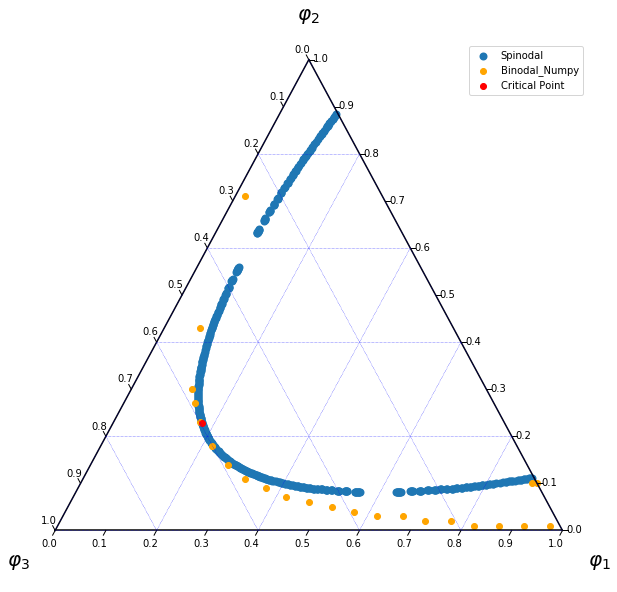

In [16]:
import ternary

indices = []
for i in range(len(binodal_points)):
    if equation_spinodal(binodal_points[i])>0.0:
        indices.append(i)
    

fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(10, 10)


tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.right_corner_label("$\\varphi_1$", fontsize=20)
tax.top_corner_label("$\\varphi_2$", fontsize=20)
tax.left_corner_label("$\\varphi_3$", fontsize=20)
tax.gridlines(multiple=0.2, color="blue")

tax.scatter(points_sp, linewidth=2.0, label="Spinodal")
# tax.scatter(binodal_points[(indices)], marker='o', color='yellow', label="Binodal")
tax.scatter(binodal_points[(indices)], marker='o', color='orange', label="Binodal_Numpy")
tax.scatter([(rounded_root[0,0], rounded_root[0,1] ,1.-sum(rounded_root[0]))], marker='o', color='red', 
            label="Critical Point")



tax.legend()
tax.show()

# fig.savefig(r'C:\Users\Ehsan\Desktop\plot.tiff',dpi=600)